# What are the most demanded skills for the top 3 most popular data roles?


### Methodology

1. Clean up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings

In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
import ast 
import seaborn as sns

#Loading Data
df = pd.read_csv('/Users/robertocortez/Desktop/data_jobs.csv')

# Data Cleanup 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Converting job_skills column from str to list
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) and pd.notna(skill_list) else skill_list
) 

In [17]:
# Creating a new dataframe that filters for only jobs in the United States

df_US = df[df['job_country'] == 'United States'].copy()


In [18]:
# Using .explode() to seperate out the skills column
df_skills = df_US.explode('job_skills')
df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,NaN
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,NaN
785705,Data Analyst,sql
785705,Data Analyst,python


In [19]:
# Using groupby to count the number of times a skill is mentioned in the job_skills column

df_skills_grouped = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_grouped = df_skills_grouped.reset_index(name='skill_count')
df_skills_grouped.sort_values(by='skill_count', ascending=False, inplace=True) 

df_skills_grouped

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [20]:
# Creating a list of the top 3 job titles
job_titles = df_skills_grouped['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

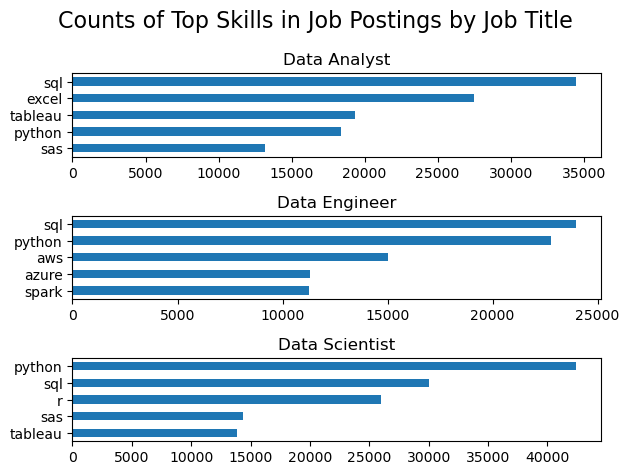

In [25]:
# Creating a bar chart for each job title
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_grouped[df_skills_grouped['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings by Job Title', fontsize=16)

plt.tight_layout()
plt.show()

In [26]:
# Finding the percentage of skills that are mentioned in each job title

df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [28]:
# Merging df_skills_grouped with df_job_title_count

df_skill_perc = pd.merge(df_skills_grouped, df_job_title_count, how='left', on='job_title_short')

df_skill_perc

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [30]:
# Creating a new column that calculates the percentage of times a skill is mentioned in a job title

df_skill_perc['skill_percent'] = 100 * (df_skill_perc['skill_count'] / df_skill_perc['jobs_total'])

df_skill_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


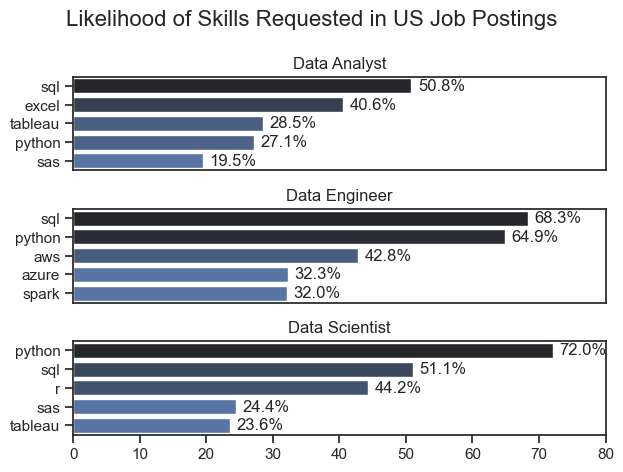

In [57]:
# Creating a plot that shows the percentage of times a skill is mentioned in a job title

fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)
    bar_plot = sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 80)
    
    # Add value labels on each bar
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.1f}%', va='center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])


fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=16)
plt.tight_layout()
plt.show()